# USE CASE: PREDICTING CHURN RATE

We have been given a dataset of 10000 customers of a bank which has been observing unusual churning rates. Our goal is to build a machine learning model using artificial neural networks and predict the churning rates. We use the MLP classifier from the sklearn library. As the dataset is an imbalanced one, we use synthetic minority oversampling technique to account for the imbalance. The model gives an accuracy of 87 % with a recall value of 89 % for churning customers. We also compare the results with the random forest classifier taking 10,20,30 and 40 trees. Random Forest classifier gives comparable accuracy overall but is not able to give high accuracy for predicting churning

In [36]:
# Import Libraries

In [148]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Import dataset and take a peek at the data

In [21]:
df = pd.read_excel("Churn_ANN.xlsx")

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# Dimensions

In [23]:
df.shape

(10000, 14)

# DATA EXPLORATION

In [59]:
# 1. Drop columns and take a peek at the data 

In [56]:
df1 = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [57]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
# 2. Dimensions

In [62]:
df.shape

(10000, 14)

In [63]:
# 3. Data Types

In [64]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [65]:
# 4. Descriptive statistics

In [66]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [67]:
# 5. Class Distribution

In [68]:
df1.groupby("Geography").size()

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

(array([5014.,    0.,    0.,    0.,    0., 2509.,    0.,    0.,    0.,
        2477.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

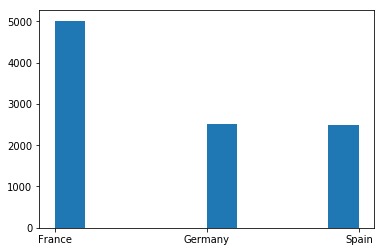

In [71]:
plt.hist(df1['Geography']) 

In [72]:
df1.groupby("Gender").size()

Gender
Female    4543
Male      5457
dtype: int64

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

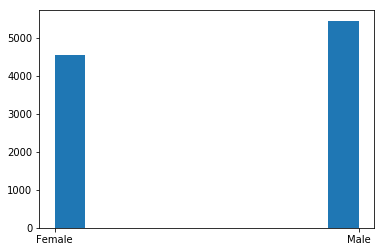

In [73]:
plt.hist(df1['Gender']) 

In [189]:
df1.groupby("Exited").size()

Exited
0    7963
1    2037
dtype: int64

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

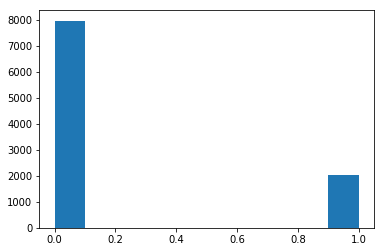

In [74]:
plt.hist(df1['Exited']) 

In [181]:
df1.groupby("HasCrCard").size()

HasCrCard
0    2945
1    7055
dtype: int64

(array([2945.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7055.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

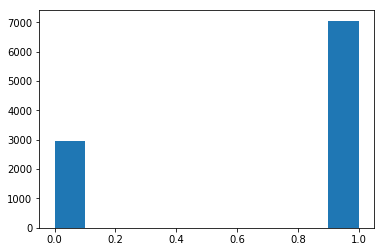

In [182]:
plt.hist(df1['HasCrCard']) 

In [185]:
df1.groupby("IsActiveMember").size()

IsActiveMember
0    4849
1    5151
dtype: int64

(array([4849.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5151.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

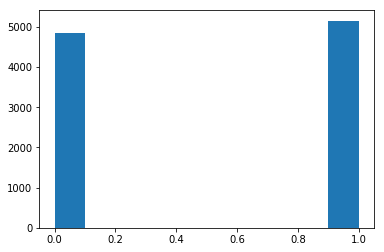

In [186]:
plt.hist(df1['IsActiveMember']) 

In [187]:
df1.groupby("NumOfProducts").size()

NumOfProducts
1    5084
2    4590
3     266
4      60
dtype: int64

(array([5084.,    0.,    0., 4590.,    0.,    0.,  266.,    0.,    0.,
          60.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

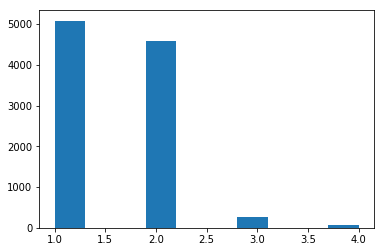

In [188]:
plt.hist(df1['NumOfProducts']) 

In [75]:
# 6. Correlation between attributes 

In [76]:
df1.corr(method = "pearson")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [77]:
# 7. SKEW OF UNIVARIATE DISTRIBUTIONS

In [78]:
df1.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [79]:
# 8. DATA INFERENCES

In [80]:
df1.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [81]:
df1.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [82]:
df1.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [190]:
df1.groupby('HasCrCard').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
HasCrCard,,,,,,,,
0,651.345331,39.112054,4.911715,77920.787552,1.527334,0.524278,100974.397711,0.208149
1,650.187952,38.842381,5.054996,75886.913330,1.531396,0.511269,99721.161949,0.201843


In [191]:
df1.groupby('IsActiveMember').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
IsActiveMember,,,,,,,,
0,647.973603,37.997938,5.097340,77134.376863,1.524438,0.711074,100767.203854,0.268509
1,652.934188,39.791497,4.933217,75875.422145,1.535624,0.700252,99452.965894,0.142691


In [192]:
df1.groupby('NumOfProducts').mean()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
NumOfProducts,,,,,,,,
1,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,652.188671,37.753595,5.051852,51879.145813,0.707190,0.532898,100452.012821,0.075817
3,648.105263,43.195489,5.003759,75458.328195,0.714286,0.424812,104318.130564,0.827068
4,653.583333,45.683333,5.300000,93733.135000,0.683333,0.483333,104763.723333,1.000000


# DATA VISUALIZATION

In [83]:
# 1. UNIVARIATE PLOTS

In [84]:
# 1.1. HISTOGRAMS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3156092f28>,
      dtype=object)

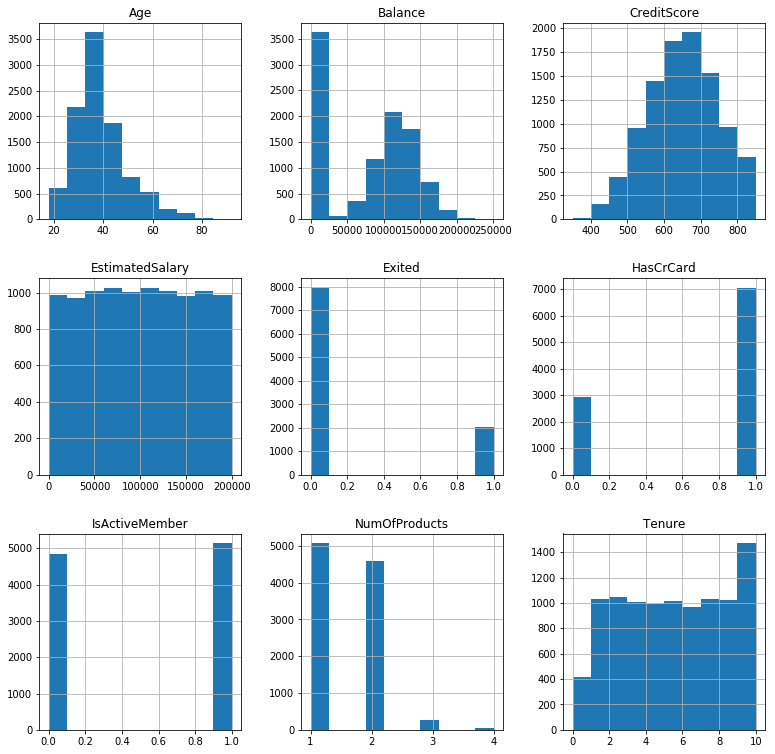

In [193]:
df1.hist(layout = (3,3), sharex = False,figsize = (13,13))

In [111]:
# 1.2. DENSITY PLOTS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31655e8c88>,
      dtype=object)

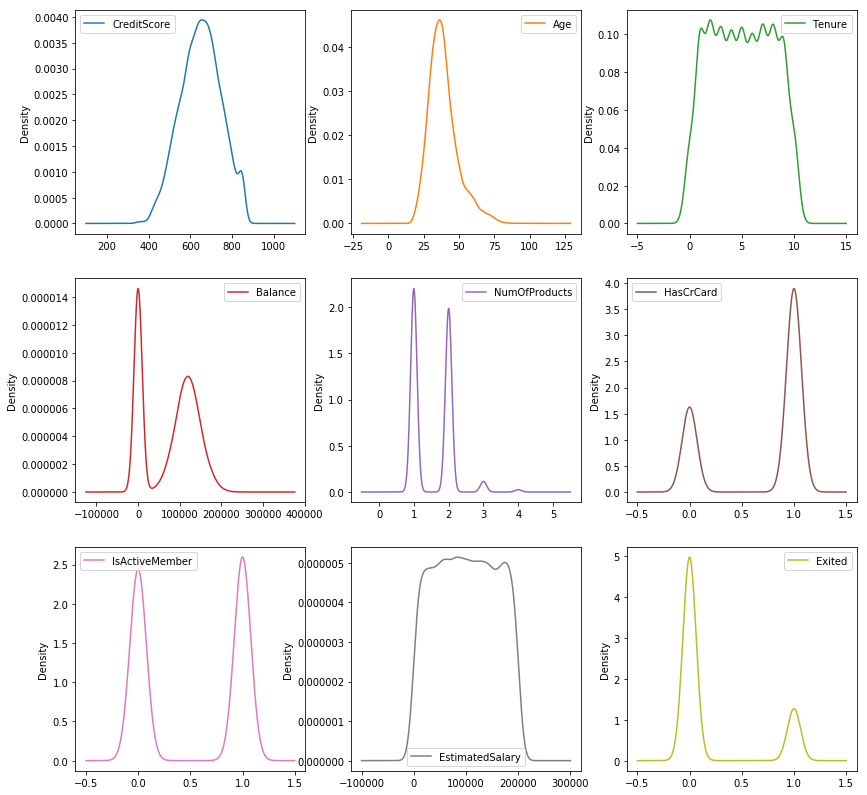

In [112]:
df1.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize = (14,14))

In [113]:
# 1.3 BOX AND WHISKER PLOTS

CreditScore           AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age                AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Tenure             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Balance               AxesSubplot(0.125,0.391471;0.227941x0.222059)
NumOfProducts      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
HasCrCard          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
IsActiveMember           AxesSubplot(0.125,0.125;0.227941x0.222059)
EstimatedSalary       AxesSubplot(0.398529,0.125;0.227941x0.222059)
Exited                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

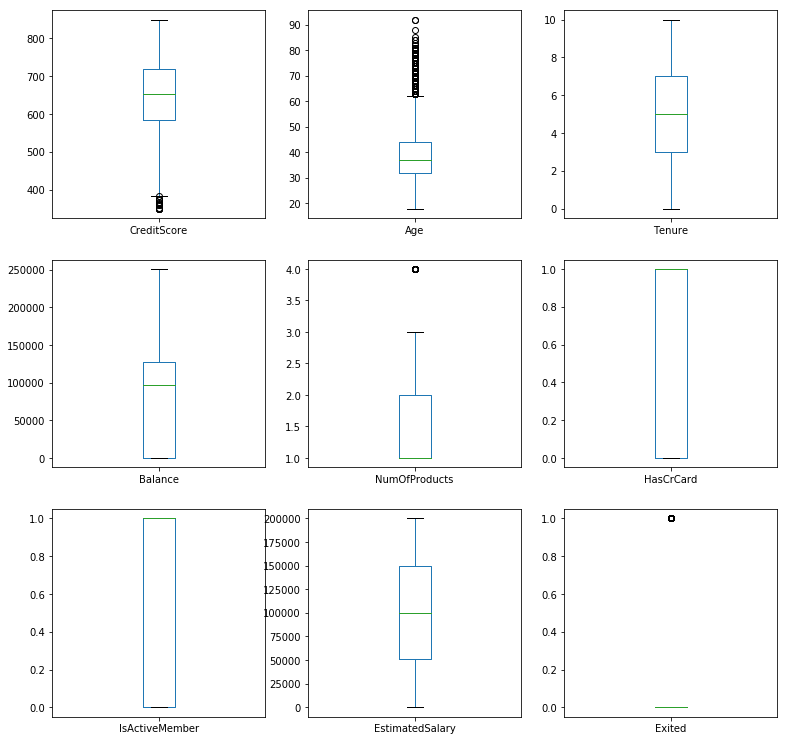

In [194]:
df1.plot(kind='box', layout = (3,3),subplots=True, sharex=False, sharey=False,figsize = (13,13))

In [128]:
# 3. STACKED BAR PLOTS

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


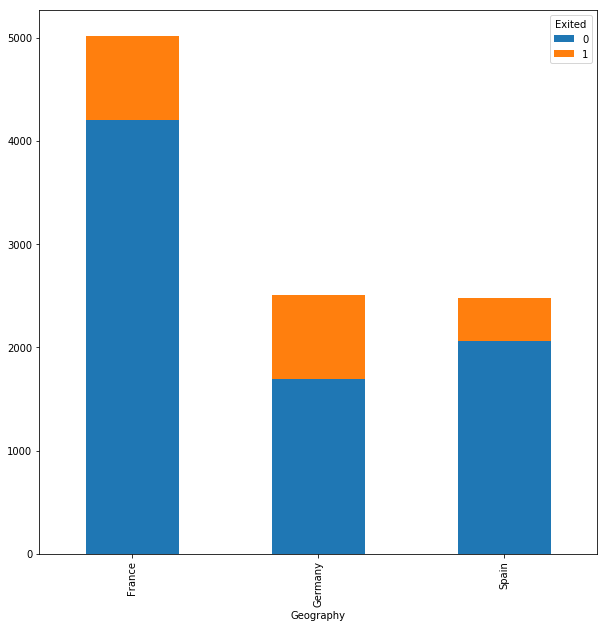

In [131]:
ct1 = pd.crosstab(df1['Geography'],df1['Exited'])
ct1.plot.bar(stacked=True,figsize= (10,10))
ct1

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


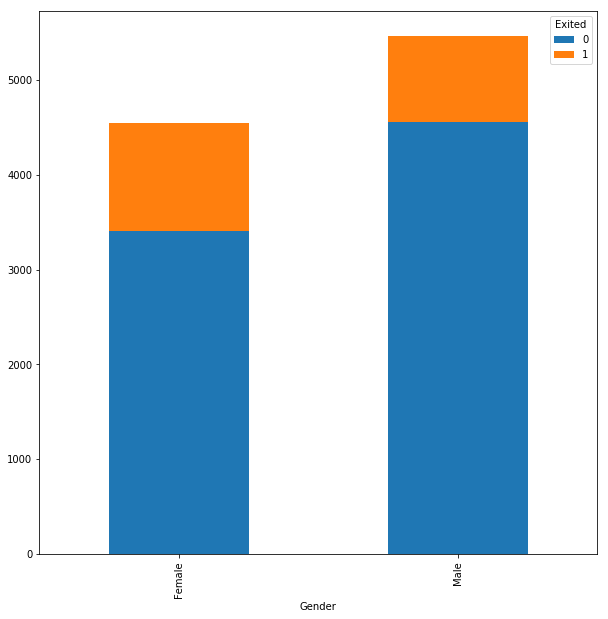

In [138]:
ct2 = pd.crosstab(df1['Gender'],df1['Exited'])
ct2.plot.bar(stacked=True,figsize= (10,10))
ct2

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


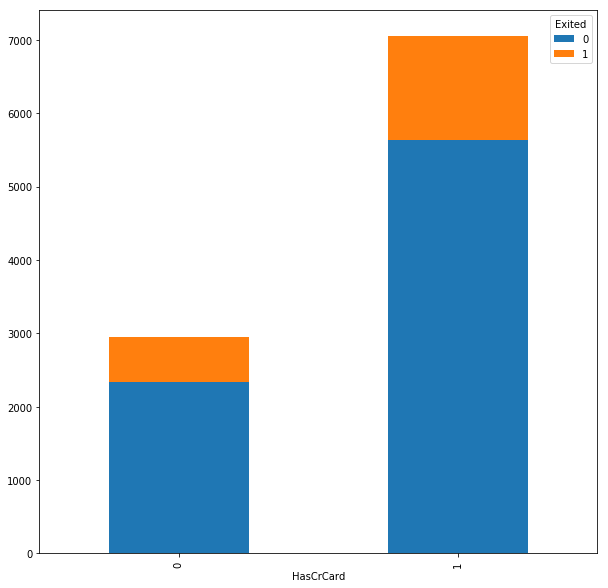

In [133]:
ct3 = pd.crosstab(df1['HasCrCard'],df1['Exited'])
ct3.plot.bar(stacked=True,figsize= (10,10))
ct3

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


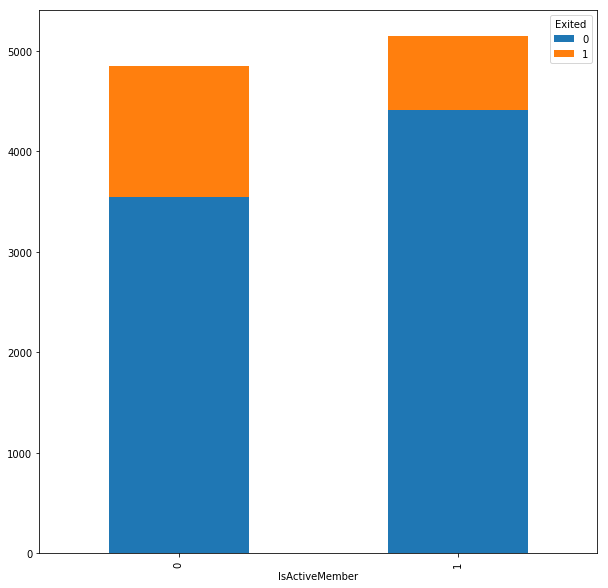

In [135]:
ct4 = pd.crosstab(df1['IsActiveMember'],df1['Exited'])
ct4.plot.bar(stacked=True,figsize= (10,10))
ct4

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


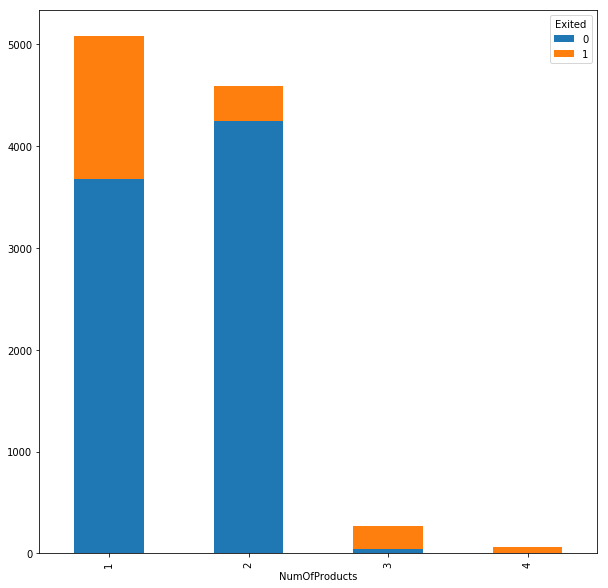

In [136]:
ct5 = pd.crosstab(df1['NumOfProducts'],df1['Exited'])
ct5.plot.bar(stacked=True,figsize= (10,10))
ct5

In [52]:
df2 = df1.rename(columns = {'CreditScore':'CS','Geography':'GO','Gender':'GE','Age':'AG','Tenure':'TE','Balance':'BA','NumOfProducts':'NP','HasCrCard':'HC','IsActiveMember':'IM','EstimatedSalary':'ES','Exited':'EX'})

In [40]:
# Use dmatrices, segregate target data

In [53]:
Y, X = dmatrices('EX ~ CS + GO + GE + AG + TE + BA + NP + HC + IM + ES', df2, return_type="dataframe")

In [41]:
# Imbalanced dataset

In [54]:
df2.groupby("EX").size()

EX
0    7963
1    2037
dtype: int64

# ARTIFICIAL NEURAL NETWORKS

In [42]:
# Select 4 layers with 100, 50, 10 and 5 neurons

In [43]:

mlp = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto',max_iter = 200, solver = 'adam',hidden_layer_sizes=(100,50,10,5))

In [44]:
# Use SMOTE for oversampling

In [30]:
method = SMOTE(kind='regular')
X_res, Y_res = method.fit_sample(X, Y)

/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# Split into test and traing data

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size = 0.2,random_state = 0)

In [46]:
# Use standard scaler

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Fit the data

In [33]:
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [49]:
# perform predictions

In [34]:
predictions = mlp.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[1388  202]
 [ 173 1423]]


In [50]:
# Print classification report

In [35]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.89      0.87      0.88      1590
        1.0       0.88      0.89      0.88      1596

avg / total       0.88      0.88      0.88      3186



In [145]:
# Confusion matrix plot

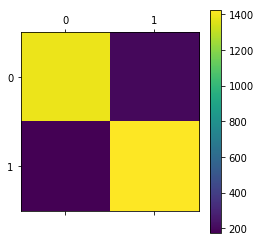

In [146]:
cm = confusion_matrix(Y_test, predictions)
plt.matshow(cm)
plt.colorbar()

# RANDOM FOREST CLASSIFIER

In [149]:
# TRAIN TEST SPLIT

In [157]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [152]:
# PREPARE THE DATA

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train1 = scaler.fit_transform(X_train1)
rescaledX_test1 = scaler.fit_transform(X_test1)

In [154]:
# INSTANTIATE MODELS

In [156]:
modelr = RandomForestClassifier(class_weight = "balanced")

In [159]:
# FIT THE DATA

In [161]:
modelr.fit(X_train1,Y_train1) # NUMBER OF TREES = 10

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [162]:
# CALCULATE MODEL SCORES

In [163]:
modelr.score(X_test1,Y_test1)

0.8565

In [164]:
# CONFUSION MATRIX METRICS

In [165]:
predictedr = modelr.predict(X_test1)

In [167]:
from sklearn import metrics

In [168]:
print(metrics.confusion_matrix(Y_test1, predictedr))
print (metrics.classification_report(Y_test1, predictedr))

[[1535   60]
 [ 227  178]]
             precision    recall  f1-score   support

        0.0       0.87      0.96      0.91      1595
        1.0       0.75      0.44      0.55       405

avg / total       0.85      0.86      0.84      2000



In [169]:
# CONFUSION MATRIX

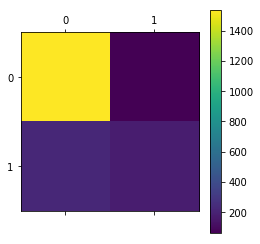

In [170]:
cm = confusion_matrix(Y_test1, predictedr)
plt.matshow(cm)
plt.colorbar()

In [171]:
# RANDOM FOREST CLASSIFIER : NUMBER OF TREES  = 20

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1536   59]
 [ 217  188]]
             precision    recall  f1-score   support

        0.0       0.88      0.96      0.92      1595
        1.0       0.76      0.46      0.58       405

avg / total       0.85      0.86      0.85      2000



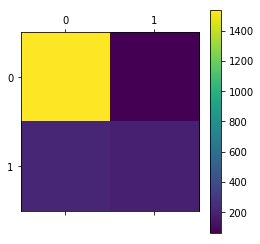

In [180]:
modelr2 = RandomForestClassifier(class_weight = "balanced",n_estimators = 20)
modelr2.fit(X_train1,Y_train1) # NUMBER OF TREES = 20
modelr2.score(X_test1,Y_test1)
predictedr2 = modelr2.predict(X_test1)
print(metrics.confusion_matrix(Y_test1, predictedr2))
print (metrics.classification_report(Y_test1, predictedr2))
cm = confusion_matrix(Y_test1, predictedr2)
plt.matshow(cm)
plt.colorbar()

In [195]:
# RANDOM FOREST CLASSIFIER : NUMBER OF TREES  = 100

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1533   62]
 [ 205  200]]
             precision    recall  f1-score   support

        0.0       0.88      0.96      0.92      1595
        1.0       0.76      0.49      0.60       405

avg / total       0.86      0.87      0.86      2000



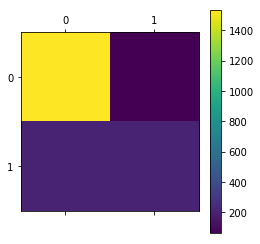

In [198]:
modelr3 = RandomForestClassifier(class_weight = "balanced",n_estimators = 100)
modelr3.fit(X_train1,Y_train1) # NUMBER OF TREES = 100
modelr3.score(X_test1,Y_test1)
predictedr3 = modelr3.predict(X_test1)
print(metrics.confusion_matrix(Y_test1, predictedr3))
print (metrics.classification_report(Y_test1, predictedr3))
cm = confusion_matrix(Y_test1, predictedr3)
plt.matshow(cm)
plt.colorbar()

In [175]:
# RANDOM FOREST CLASSIFIER : NUMBER OF TREES  = 300

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1529   66]
 [ 204  201]]
             precision    recall  f1-score   support

        0.0       0.88      0.96      0.92      1595
        1.0       0.75      0.50      0.60       405

avg / total       0.86      0.86      0.85      2000



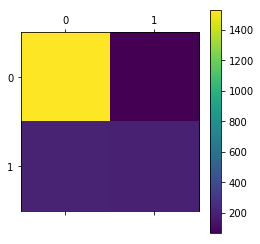

In [199]:
modelr4 = RandomForestClassifier(class_weight = "balanced",n_estimators = 300)
modelr4.fit(X_train1,Y_train1) # NUMBER OF TREES = 300
modelr4.score(X_test1,Y_test1)
predictedr4 = modelr4.predict(X_test1)
print(metrics.confusion_matrix(Y_test1, predictedr4))
print (metrics.classification_report(Y_test1, predictedr4))
cm = confusion_matrix(Y_test1, predictedr4)
plt.matshow(cm)
plt.colorbar()